In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

In [2]:
data = pd.read_csv("./data/data.csv")
data.head(3)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74


In [3]:
data.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [4]:
data.dropna(inplace=True)
data.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

# **Converting string values into float** 

In [5]:
# Sparse_output=False is output array instead of matrix
encoder = OneHotEncoder(sparse_output=False)

categorical_columns = ["Parental_Involvement", "Access_to_Resources", "Extracurricular_Activities",
                      "Motivation_Level", "Internet_Access", "Family_Income", "Teacher_Quality",
                      "Parental_Education_Level", "Distance_from_Home", "Gender", "School_Type", 
                      "Peer_Influence", "Learning_Disabilities"]

one_hot_encoded = encoder.fit_transform(data[categorical_columns])

one_hot_encoded = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

df = pd.concat([data.drop(columns=categorical_columns), one_hot_encoded], axis=1)
df.dropna(inplace=True)
list(df.columns)

['Hours_Studied',
 'Attendance',
 'Sleep_Hours',
 'Previous_Scores',
 'Tutoring_Sessions',
 'Physical_Activity',
 'Exam_Score',
 'Parental_Involvement_High',
 'Parental_Involvement_Low',
 'Parental_Involvement_Medium',
 'Access_to_Resources_High',
 'Access_to_Resources_Low',
 'Access_to_Resources_Medium',
 'Extracurricular_Activities_No',
 'Extracurricular_Activities_Yes',
 'Motivation_Level_High',
 'Motivation_Level_Low',
 'Motivation_Level_Medium',
 'Internet_Access_No',
 'Internet_Access_Yes',
 'Family_Income_High',
 'Family_Income_Low',
 'Family_Income_Medium',
 'Teacher_Quality_High',
 'Teacher_Quality_Low',
 'Teacher_Quality_Medium',
 'Parental_Education_Level_College',
 'Parental_Education_Level_High School',
 'Parental_Education_Level_Postgraduate',
 'Distance_from_Home_Far',
 'Distance_from_Home_Moderate',
 'Distance_from_Home_Near',
 'Gender_Female',
 'Gender_Male',
 'School_Type_Private',
 'School_Type_Public',
 'Peer_Influence_Negative',
 'Peer_Influence_Neutral',
 'Peer_In

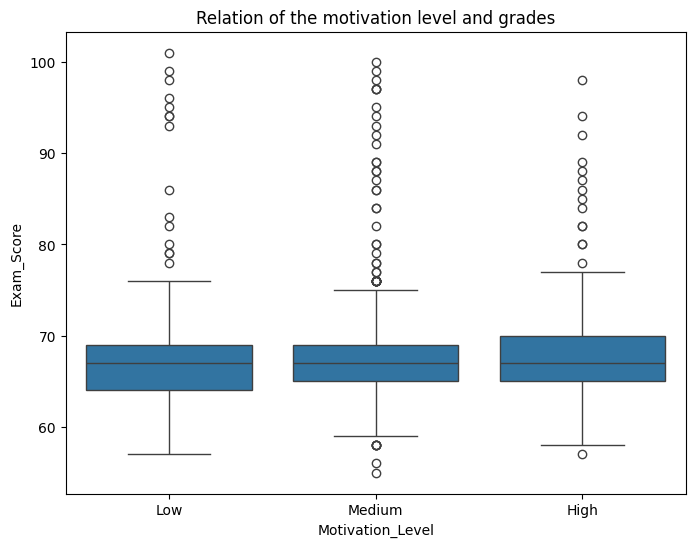

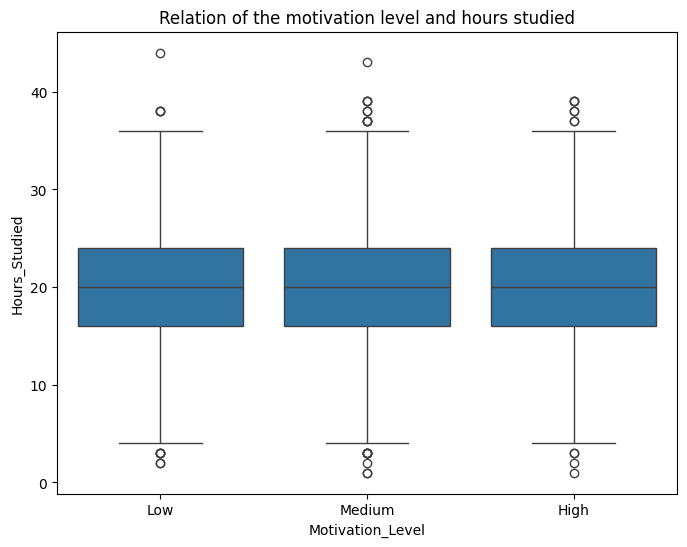

Mean values analysis:
                  Hours_Studied  Attendance  Tutoring_Sessions
Motivation_Level                                              
High                  19.749413   79.814409           1.522318
Low                   19.983369   79.950107           1.497854
Medium                20.063330   80.143034           1.483163


In [6]:
# mot_low, mot_med, mot_high = "Motivation_Level_Low", "Motivation_Level_Medium", "Motivation_Level_High"

plt.figure(figsize=(8, 6))
sns.boxplot(x="Motivation_Level", y="Exam_Score", data=data)
plt.title("Relation of the motivation level and grades")

plt.figure(figsize=(8, 6))
sns.boxplot(x="Motivation_Level", y="Hours_Studied", data=data)
plt.title("Relation of the motivation level and hours studied")
plt.show()

mean_values = data.groupby(["Motivation_Level"])[["Hours_Studied", "Attendance", "Tutoring_Sessions"]].mean()
print("Mean values analysis:")
print(mean_values)

C:\Users\opira\AppData\Local\Temp\ipykernel_5604\116865349.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  boxplot = sns.boxplot(x="Motivation_Level", y="Exam_Score", data=data, width=0.6, palette="pastel")


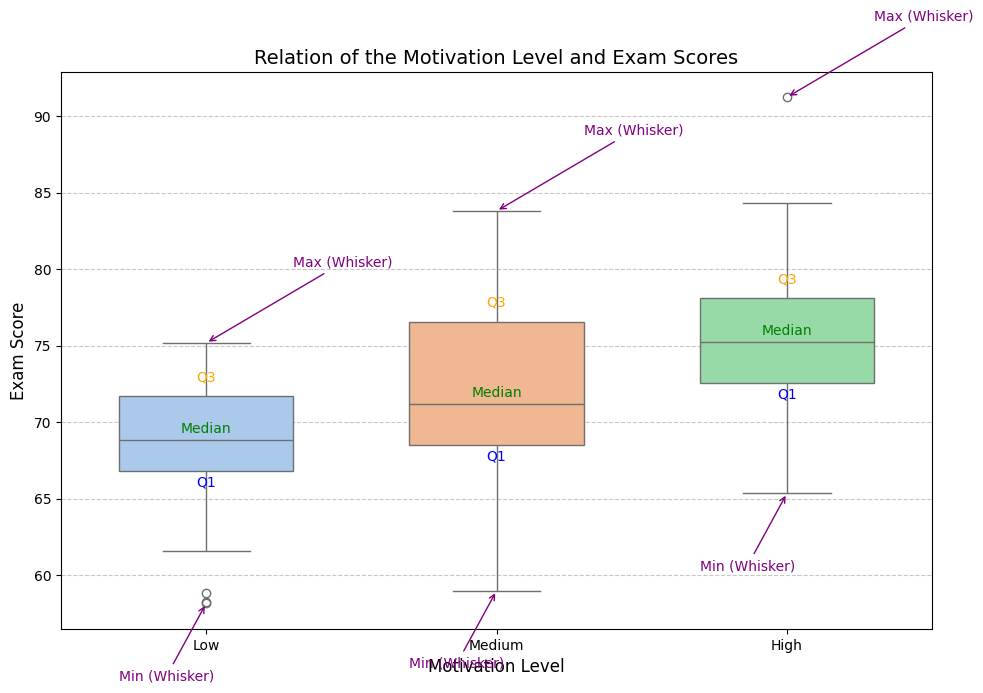

In [8]:
# Plot the boxplot
plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(x="Motivation_Level", y="Exam_Score", data=data, width=0.6, palette="pastel")
plt.title("Relation of the Motivation Level and Exam Scores", fontsize=14)
plt.xlabel("Motivation Level", fontsize=12)
plt.ylabel("Exam Score", fontsize=12)

# Annotate each boxplot
for i, motivation_level in enumerate(["Low", "Medium", "High"]):
    # Filter data for the current motivation level
    group_scores = data[data["Motivation_Level"] == motivation_level]["Exam_Score"]
    
    # Calculate Q1, Median, Q3
    q1 = group_scores.quantile(0.25)
    median = group_scores.median()
    q3 = group_scores.quantile(0.75)
    
    # Calculate whiskers
    whisker_min = group_scores.min()
    whisker_max = group_scores.max()
    
    # Annotate Q1, Median, Q3
    plt.text(i, q1 - 1, "Q1", color="blue", ha="center", fontsize=10)
    plt.text(i, median + 0.5, "Median", color="green", ha="center", fontsize=10)
    plt.text(i, q3 + 1, "Q3", color="orange", ha="center", fontsize=10)
    
    # Annotate whiskers
    plt.annotate("Min (Whisker)", (i, whisker_min), xytext=(i - 0.3, whisker_min - 5), 
                 arrowprops=dict(arrowstyle="->", color="purple"), color="purple", fontsize=10)
    plt.annotate("Max (Whisker)", (i, whisker_max), xytext=(i + 0.3, whisker_max + 5), 
                 arrowprops=dict(arrowstyle="->", color="purple"), color="purple", fontsize=10)

plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


C:\Users\opira\AppData\Local\Temp\ipykernel_5604\3969444255.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Motivation_Level", y="Exam_Score", data=data, ax=axes[0, 0], palette="Blues")
C:\Users\opira\AppData\Local\Temp\ipykernel_5604\3969444255.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Motivation_Level", y="Exam_Score", data=data, ax=axes[0, 1], palette="Oranges")
C:\Users\opira\AppData\Local\Temp\ipykernel_5604\3969444255.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x="Motivation_Level", y="Exam_Score", dat

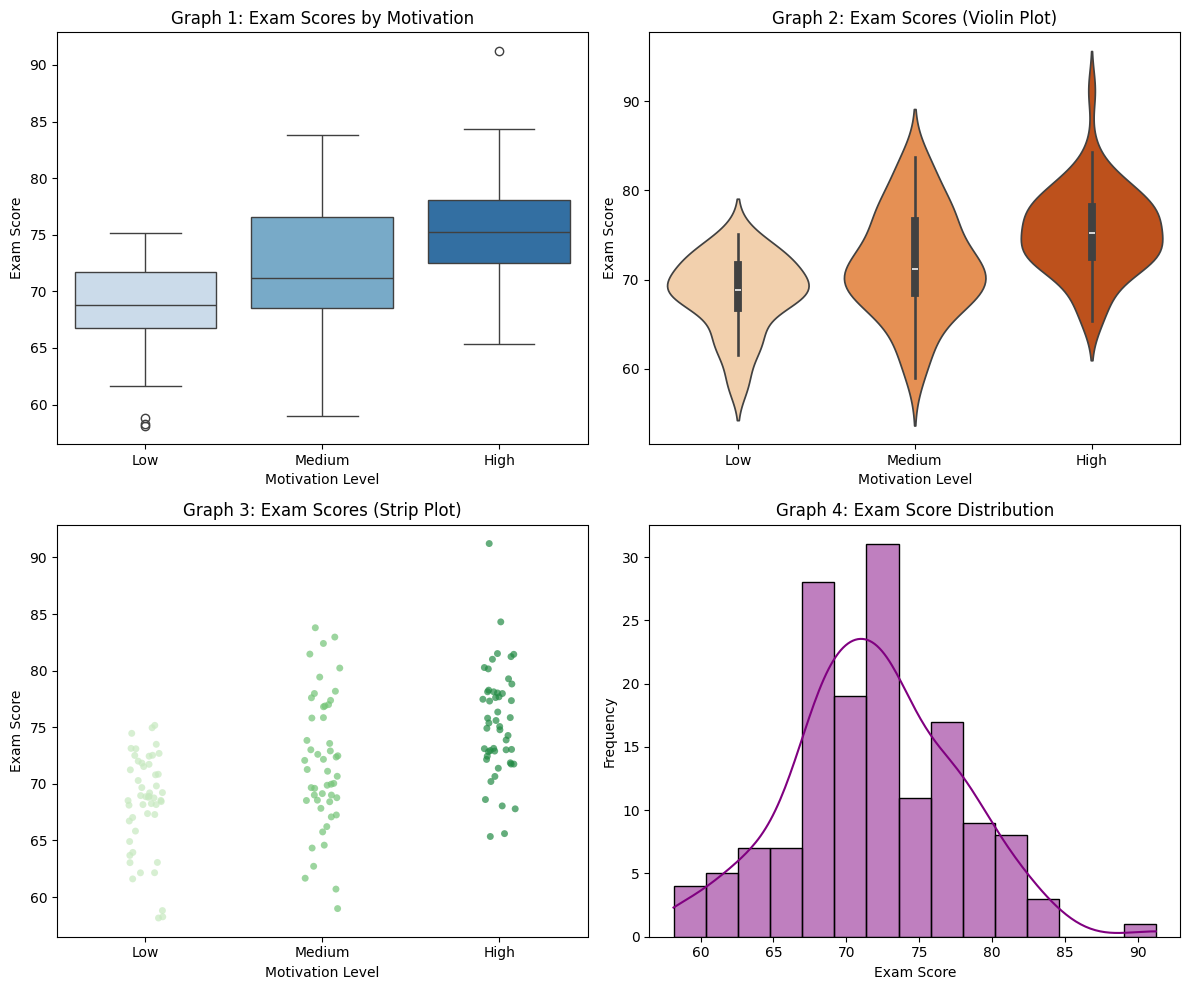

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.boxplot(x="Motivation_Level", y="Exam_Score", data=data, ax=axes[0, 0], palette="Blues")
axes[0, 0].set_title("Graph 1: Exam Scores by Motivation")
axes[0, 0].set_xlabel("Motivation Level")
axes[0, 0].set_ylabel("Exam Score")

# Второй график
sns.violinplot(x="Motivation_Level", y="Exam_Score", data=data, ax=axes[0, 1], palette="Oranges")
axes[0, 1].set_title("Graph 2: Exam Scores (Violin Plot)")
axes[0, 1].set_xlabel("Motivation Level")
axes[0, 1].set_ylabel("Exam Score")

# Третий график
sns.stripplot(x="Motivation_Level", y="Exam_Score", data=data, ax=axes[1, 0], jitter=True, palette="Greens", alpha=0.7)
axes[1, 0].set_title("Graph 3: Exam Scores (Strip Plot)")
axes[1, 0].set_xlabel("Motivation Level")
axes[1, 0].set_ylabel("Exam Score")

# Четвертый график
sns.histplot(data["Exam_Score"], bins=15, kde=True, ax=axes[1, 1], color="purple")
axes[1, 1].set_title("Graph 4: Exam Score Distribution")
axes[1, 1].set_xlabel("Exam Score")
axes[1, 1].set_ylabel("Frequency")

plt.tight_layout()

plt.show()